# Data Analysis of Fast Food Nutrition Facts
The following is a summary of the statistical analysis of the data set found on [Kaggle](https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition?resource=download). This analysis was performed primarily using the Python pandas library. 

The goal in this analysis is to address three questions:
* Is Chick-Fil-A healthier than McDonalds with regards to calories? 
* What items contain the highest amount of sodium? What about protein?
* What are the nutritional facts across a related group of foods such as burgers/sandwiches/nuggets?

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the csv file into a pandas DataFrame
fastfood = pd.read_csv('fastfood.csv', delimiter=',')

### **Question 1:** Is Chick-Fil-A healthier than McDonalds with regards to calories?  

##### *Statistical Summary of Calorie Data*

Below is a quick statistical summary of the calorie distribution across the different menu items for each restaurant, accompanied by a box plot representing the summary. Our initial question aims to compare the restaurants based on calorie intake across the menu items in the data.

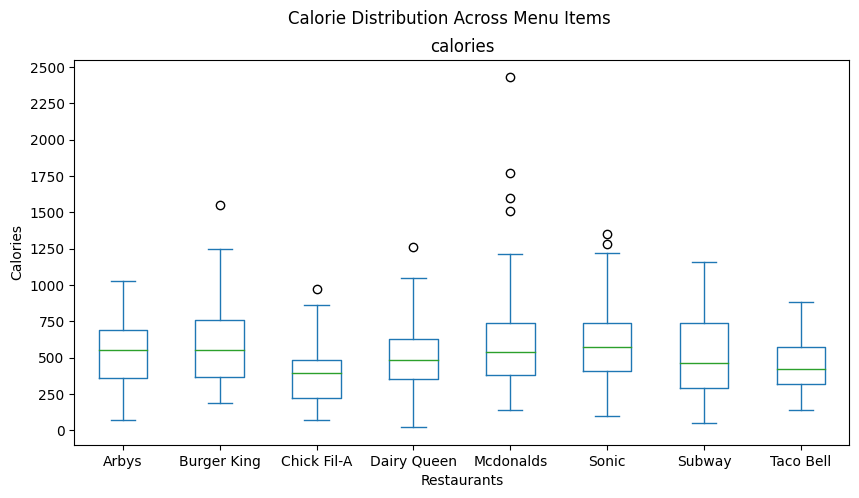

In [27]:
# Select portion of the data by label (column)
calorieData = fastfood.loc[:, ["restaurant", "calories"]]

# Create plot of the calorie data by restaurant in a box plot
calorieData.plot.box(by='restaurant', title='Calorie Distribution Across Menu Items', 
              figsize=(10, 5),
              yticks=np.arange(0,2750,250),
              xlabel='Restaurants', ylabel='Calories')

# Show box plot
plt.show()

Visually, we can see that the distribution of calories for Chick-Fil-A is lower than McDonalds. Additionally, Mcdonalds also includes the highest calorie item. Below we can view the physical numbers associated with this plot.

In [28]:
# Create new dataFrame with quick statistical summary data
summary = fastfood.groupby('restaurant').describe()["calories"]

# Display the stylized table
summary.style.set_caption("Statistical Summary of Calories") \
.format(precision=1) \
.highlight_max(color='red') \
.highlight_min(color='green') 

,count,mean,std,min,25%,50%,75%,max
restaurant,,,,,,,,
Arbys,55.0,532.7,210.3,70.0,360.0,550.0,690.0,1030.0
Burger King,70.0,608.6,290.4,190.0,365.0,555.0,760.0,1550.0
Chick Fil-A,27.0,384.4,220.5,70.0,220.0,390.0,480.0,970.0
Dairy Queen,42.0,520.2,259.3,20.0,350.0,485.0,630.0,1260.0
Mcdonalds,57.0,640.4,410.7,140.0,380.0,540.0,740.0,2430.0
Sonic,53.0,631.7,300.9,100.0,410.0,570.0,740.0,1350.0
Subway,96.0,503.0,282.2,50.0,287.5,460.0,740.0,1160.0
Taco Bell,115.0,443.7,184.3,140.0,320.0,420.0,575.0,880.0


We can specifically compare McDonalds and Chick-Fil-A's data side-by-side to assist in answering question one:

In [29]:
# Select by index (row)
summary.loc[['Chick Fil-A', 'Mcdonalds']] \
.style.format(precision=1) \
.highlight_max(color='red') 

,count,mean,std,min,25%,50%,75%,max
restaurant,,,,,,,,
Chick Fil-A,27.0,384.4,220.5,70.0,220.0,390.0,480.0,970.0
Mcdonalds,57.0,640.4,410.7,140.0,380.0,540.0,740.0,2430.0


Based on these numbers we can see that the average number of calories for Chick-Fil-A is almost half of McDonalds. It's clear that Chick-Fil-A has less calories on every other statistical marker as well. If you're looking for something with less calories, I'd say you're much more likely to find that at Chick-Fil-A.

### **Question 2:** What items contain the highest amount of sodium? What about protein?

##### *Comparing Columns*

Below we are sorting the rows by a column and then taking a slice of the highest values to see which fast food items have highest sodium and protein. 

In [30]:
# Select and sort by sodium column, select the tail of the data which is now the items with the 
# most sodium
sodiumData = fastfood.loc[:, ['restaurant', 'item', 'sodium']].sort_values(['sodium']).tail()

# Stylize and display the table
sodiumData.style \
.format_index(str.capitalize, axis=1) \
.hide(axis=0)

Restaurant,Item,Sodium
Chick Fil-A,30 piece Chicken Nuggets,3660
Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,3770
Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,4450
Sonic,Buffalo Dunked Ultimate Chicken Sandwich,4520
Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,6080


Interesting to note that these items are chicken based fast food items, and that McDonalds comprises the majority of those high sodium foods.

In [31]:
proteinData = fastfood.loc[:, ['restaurant', 'item', 'protein']].dropna(axis=0) \
.sort_values(['protein']).tail()

# Stylize and display the table
proteinData.style \
.format_index(str.capitalize, axis=1) \
.format(precision=1) \
.hide(axis=0)

Restaurant,Item,Protein
Mcdonalds,40 piece Chicken McNuggets,98.0
Chick Fil-A,30 piece Chicken Nuggets,103.0
Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,115.0
Burger King,American Brewhouse King,134.0
Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,186.0


Here we can note, again majority chicken based foods and McDonalds as well. 

### **Question 3:** What are the nutritional facts across a related group of foods such as burgers/sandwiches/nuggets?

##### *Finding Groups Based on String Patterns*

Here we want to get rows related to a specific type of menu item. Pandas allows us to find string patterns and return a series associating the row's index with a boolean (true/false).

In [32]:
# Create series of bools. True if item name contains 'nuggets', ignore case
nuggets = fastfood['item'].str.contains(pat='nugget', case=False)

# Create list of indexes where 'nuggets' was in the item name
i = nuggets[nuggets].index

# Select rows based on list of indexes
table = fastfood.iloc[i, :13]

table.style.set_caption(f'Nutrition Data for \'Nugget\' ') \
    .format(precision=1) \
    .format_index(str.capitalize, axis=1) \
    .hide(axis=0) \
    .highlight_max(subset=table.columns[2:], color='red')

Restaurant,Item,Calories,Cal_fat,Total_fat,Sat_fat,Trans_fat,Cholesterol,Sodium,Total_carb,Fiber,Sugar,Protein
Mcdonalds,4 Piece Chicken McNuggets,180,100,11,2.0,0.0,30,340,11,1.0,0,10.0
Mcdonalds,6 Piece Chicken McNuggets,270,140,16,2.5,0.0,45,510,16,1.0,0,15.0
Mcdonalds,10 Piece Chicken McNuggets,440,240,27,4.5,0.0,75,840,26,2.0,0,24.0
Mcdonalds,20 Piece Chicken McNuggets,890,480,53,9.0,0.0,145,1680,53,4.0,0,49.0
Mcdonalds,40 piece Chicken McNuggets,1770,960,107,18.0,0.5,295,3370,105,7.0,1,98.0
Chick Fil-A,4 piece Chicken Nuggets,130,54,6,1.5,0.0,40,490,5,1.0,0,14.0
Chick Fil-A,6 piece Chicken Nuggets,190,81,9,1.5,0.0,55,730,7,1.0,0,21.0
Chick Fil-A,8 piece Chicken Nuggets,260,110,12,3.0,0.0,70,990,9,1.0,1,28.0
Chick Fil-A,12 piece Chicken Nuggets,390,162,18,1.5,0.0,115,1460,14,2.0,1,41.0
Chick Fil-A,30 piece Chicken Nuggets,970,414,46,2.5,0.0,285,3660,35,4.0,1,103.0
